<a href="https://colab.research.google.com/github/ophirlevinson/Pneumonia-Detection/blob/master/Pneumonia_Detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pneumonia-Detection

##Imports

In [2]:
!pip install -q -U tensorflow_hub
!pip install -q tf-nightly-gpu
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

import tensorflow as tf

     |████████████████████████████████| 411.0MB 34kB/s 
     |████████████████████████████████| 3.8MB 32.9MB/s 
     |████████████████████████████████| 450kB 44.0MB/s 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [0]:
tf.enable_eager_execution()

In [0]:
import tensorflow_hub as hub

from tensorflow.keras import layers

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Download Kaggle dataset
Use Kaggle : "https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"

In [25]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"levinsonophir","key":"ADD-YOUR-KEY-HERE"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [29]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [30]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 1.14G/1.15G [00:18<00:00, 69.7MB/s]
100% 1.15G/1.15G [00:18<00:00, 68.3MB/s]


In [31]:
!cd /content/datasets/paultimothymooney/chest-xray-pneumonia && unzip *.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray.zip          


In [32]:
!cd /content/datasets/paultimothymooney/chest-xray-pneumonia && unzip chest_xray.zip

Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUM

In [33]:
!cd /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train && ls -l

total 260
drwxr-xr-x 2 root root  69632 Mar 22  2018 NORMAL
drwxr-xr-x 2 root root 188416 Mar 22  2018 PNEUMONIA


In [34]:
!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/.DS_Store
!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/.DS_Store
!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/.DS_Store

!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/.DS_Store
!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/.DS_Store
!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/.DS_Store

!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/val/.DS_Store
!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/val/NORMAL/.DS_Store
!rmdir /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/.DS_Store

rmdir: failed to remove '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/.DS_Store': Not a directory
rmdir: failed to remove '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/.DS_Store': No such file or directory
rmdir: failed to remove '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/.DS_Store': No such file or directory
rmdir: failed to remove '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/.DS_Store': Not a directory
rmdir: failed to remove '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/NORMAL/.DS_Store': Not a directory
rmdir: failed to remove '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/.DS_Store': Not a directory
rmdir: failed to remove '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/val/.DS_Store': Not a directory
rmdir: failed to remove '/content/datasets/paultimothymooney/c

In [35]:
!ls /content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/.DS_Store


ls: cannot access '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test/NORMAL/.DS_Store': No such file or directory


#Preprocessing

1. Build a function to return paths of all test, train and validation images
2. Create 'all_image_paths_test_pneumonia'

In [0]:
import pathlib
import IPython.display as display
import random
import matplotlib.pyplot as plt

DATA_ROOT= '/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray'

The following function retrieves the path off the shuffles paths and label for each type (type=train, test, val)

In [0]:

def get_paths_of_(path_type):
  data_root = pathlib.Path(DATA_ROOT + '/' + path_type)
  all_image_paths = list(data_root.glob('*/*.jpeg'))
  all_image_paths = [str(path) for path in all_image_paths]
  random.shuffle(all_image_paths)
  
  label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
  
  label_to_index = dict((name, index) for index,name in enumerate(label_names))

  all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]
  print("Size of {0} paths - {1}".format(path_type, len(all_image_paths)))
  return all_image_paths, all_image_labels

In [38]:
paths_train, image_labels_train = get_paths_of_('train')
paths_test,  image_labels_test  = get_paths_of_('test')
paths_val,   image_labels_val   = get_paths_of_('val')

Size of train paths - 5216
Size of test paths - 624
Size of val paths - 16


In [39]:
label_names = sorted(item.name for item in pathlib.Path(DATA_ROOT+'/train').glob('*/') if item.is_dir())
print(label_names)

['NORMAL', 'PNEUMONIA']


Load and format the images

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224, 224])
  image /= 255.0  # normalize to [0,1] range
  image.shape
  return image

In [0]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

In [0]:
img_path = paths_train[0]
img_raw = load_and_preprocess_image(img_path)


In [0]:
def showImage(image_path,label_path ,index):
  img_path = image_path[index]
  plt.imshow(load_and_preprocess_image(img_path))
  plt.grid(False)
  plt.title(label_names[label_path[index]].title())


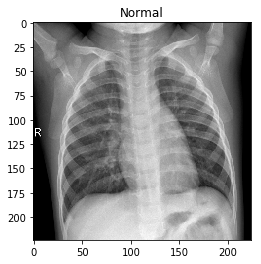

In [44]:
showImage(paths_train,image_labels_train,8)

Build a tf.data.Dataset

In [45]:
train_path_ds = tf.data.Dataset.from_tensor_slices(paths_train)
train_image_ds = train_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
train_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(image_labels_train, tf.int64))
train_image_label_ds = tf.data.Dataset.zip((train_image_ds, train_label_ds))


val_path_ds = tf.data.Dataset.from_tensor_slices(paths_val)
val_image_ds = val_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
val_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(image_labels_val, tf.int64))
val_image_label_ds = tf.data.Dataset.zip((val_image_ds, val_label_ds))

test_test_ds = tf.data.Dataset.from_tensor_slices(paths_test)
test_image_ds = test_test_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
test_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(image_labels_test, tf.int64))
test_image_label_ds = tf.data.Dataset.zip((test_image_ds, test_label_ds))

print(train_image_label_ds)
print(train_image_ds)



<DatasetV1Adapter shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int64)>
<DatasetV1Adapter shapes: (224, 224, 3), types: tf.float32>


In [47]:
ds = tf.data.Dataset.from_tensor_slices((paths_train, image_labels_train))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

train_image_label_ds = ds.map(load_and_preprocess_from_path_label)
train_image_label_ds

<DatasetV1Adapter shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int32)>

# Download classifier
Using the 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2' mobilenet_v2 classifer. 
We try it with a sample image from our dataset (first validation image) and its results to : 'trilobite'

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [49]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train'), target_size=IMAGE_SHAPE)

Found 5216 images belonging to 2 classes.


In [50]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 2)


In [51]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

Update classifier with transfer learning: 
1. Download headless model from 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'.
2. Create the module, and check the expected image size
3. Freeze the variables in the feature extractor layer, so that the training only modifies the new classifier layer.
4. Attach a classification head (with classification of 2 classes)

In [0]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,input_shape=(224,224,3))

In [0]:
feature_extractor_layer.trainable = False

In [0]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(2, activation='softmax')
])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [57]:
predictions = model(image_batch)
predictions.shape

TensorShape([Dimension(32), Dimension(2)])

# Training the model

In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [61]:
import numpy as np

steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)
print(steps_per_epoch)

163.0


In [0]:
batch_stats_callback = CollectBatchStats()

In [63]:
history = model.fit(image_data, epochs=2,
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats_callback])

Train on 5216 samples
Epoch 1/2
5216/5216 [==============================] - 131s 25ms/sample - loss: 0.2792 - acc: 0.9688
Epoch 2/2
5216/5216 [==============================] - 118s 23ms/sample - loss: 0.0998 - acc: 0.9688


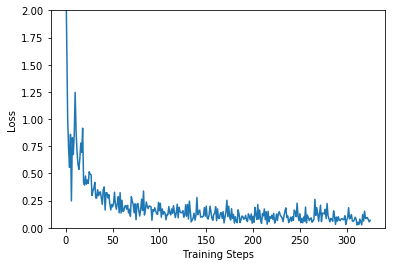

In [64]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

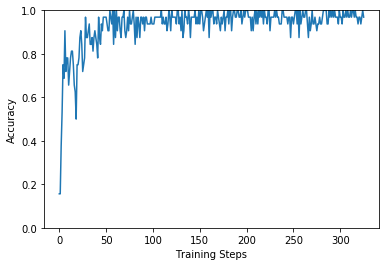

In [68]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [69]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Normal', 'Pneumonia'], dtype='<U9')

In [71]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_data = image_generator.flow_from_directory(str('/content/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/test'), target_size=IMAGE_SHAPE)
for test_batch, test_label_batch in test_data:
  print("Image batch shape: ", test_batch.shape)
  print("Label batch shape: ", test_label_batch.shape)
  break

Found 624 images belonging to 2 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 2)


In [0]:
predicted_batch = model.predict(test_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [0]:
label_id = np.argmax(test_label_batch, axis=-1)

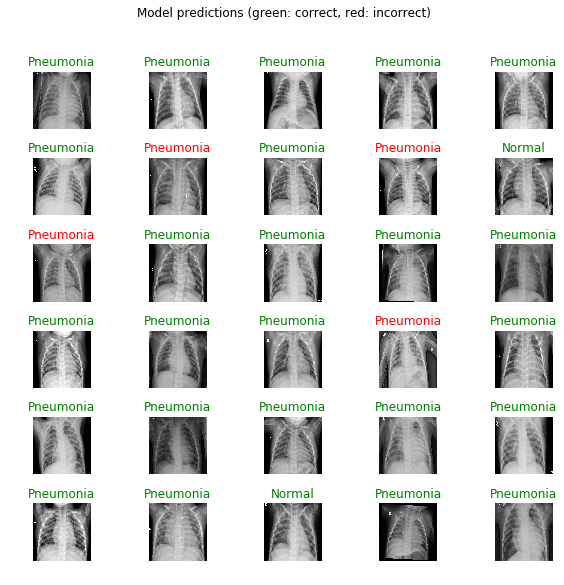

In [76]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")